## Feature engineering, Feature creation and feature storage

- Date normalization


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alternative to set svg for newer versions
%matplotlib inline


# Showing all the details of results
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# for shap value display feature engineering will be less.

data_all = pd.read_csv('./../Data/data_AutoGluon.csv')

# entry, regular 1...
data_all['entry'] = data_all['entry'].replace({'Regular': 1,'Irregular': 2, 'Foreign Imposition': 3})
data_all['entry']=data_all['entry'].astype(float, errors='raise')

# exit, regular 1...
data_all['exit'] = data_all['exit'].replace({'Regular': 1, 'Irregular': 2, 'Foreign': 3,'Natural Death': 4, 
                                    'Retired Due to Ill Health': 5, 'Suicide': 6, 'Still in Office': 7}) 
                                    
data_all['exit']=data_all['exit'].astype(float, errors='raise')

# exitcode, regular 1...
data_all['exitcode'] = data_all['exitcode'].replace({'Assassination by Unsupported Individual': 1,'Irregular, Other': 2,
                                             'Popular Protest, with Foreign Support': 3, 
                                             'Popular Protest, without Foreign Support': 4,
                                             'Regular': 5, 'Removed by Military, with Foreign Support': 6,
                                             'Removed by Military, without Foreign Support': 7, 
                                             'Removed by Other Government Actors, with Foreign Support': 8,
                                             'Removed by Other Government Actors, without Foreign Support': 9,
                                             'Removed by Rebels, with Foreign Support': 10,
                                             'Removed by Rebels, without Foreign Support': 11,
                                             'Removed in Military Power Struggle Short of Coup': 12,
                                             'Removed through Threat of Foreign Force': 13, 'Unknown': 14,
                                             'Still in Office': 15}) 
data_all['exitcode']=data_all['exitcode'].astype(float, errors='raise')

# posttenurefate
data_all['posttenurefate'] = data_all['posttenurefate'].replace({'Death': 1, 'Exile': 2, 'Imprisonment': 3, 
                                     'Missing: Natural Death within Six Months of Losing Office': 4, 
                                     'Missing: No Information Found': 5, 'OK': 6, 'Suicide': 7, 
                                     'Leader Still in Office': 8, 'Missing: Left Office after*': 9}, regex=True) 
data_all['posttenurefate']=data_all['posttenurefate'].astype(float, errors='raise')

data_all.dropna(subset = ['growth_rate'], inplace=True)
data_all.shape

# delete unused data
del data_all['end_gdppc']
del data_all['country']

(1445, 23)

In [2]:
data_all = pd.read_csv('./../Data/data_AutoGluon.csv')

# ccode int
min, max = data_all['ccode'].min(), data_all['ccode'].max()
data_all['ccode'] = (data_all['ccode']-min)/(max-min)

# entry, regular 1...
data_all['entry'] = data_all['entry'].replace({'Regular': 1,'Irregular': 2, 'Foreign Imposition': 3})
data_all['entry']=data_all['entry'].astype(float, errors='raise')
min, max = data_all['entry'].min(), data_all['entry'].max()
data_all['entry']= (data_all['entry']-min)/(max-min)

# exit, regular 1...
data_all['exit'] = data_all['exit'].replace({'Regular': 1, 'Irregular': 2, 'Foreign': 3,'Natural Death': 4, 
                                    'Retired Due to Ill Health': 5, 'Suicide': 6, 'Still in Office': 7}) 
                                    
data_all['exit']=data_all['exit'].astype(float, errors='raise')
min, max = data_all['exit'].min(), data_all['exit'].max()
data_all['exit']= (data_all['exit']-min)/(max-min)

# exitcode, regular 1...
data_all['exitcode'] = data_all['exitcode'].replace({'Assassination by Unsupported Individual': 1,'Irregular, Other': 2,
                                             'Popular Protest, with Foreign Support': 3, 
                                             'Popular Protest, without Foreign Support': 4,
                                             'Regular': 5, 'Removed by Military, with Foreign Support': 6,
                                             'Removed by Military, without Foreign Support': 7, 
                                             'Removed by Other Government Actors, with Foreign Support': 8,
                                             'Removed by Other Government Actors, without Foreign Support': 9,
                                             'Removed by Rebels, with Foreign Support': 10,
                                             'Removed by Rebels, without Foreign Support': 11,
                                             'Removed in Military Power Struggle Short of Coup': 12,
                                             'Removed through Threat of Foreign Force': 13, 'Unknown': 14,
                                             'Still in Office': 15}) 
data_all['exitcode']=data_all['exitcode'].astype(float, errors='raise')
min, max = data_all['exitcode'].min(), data_all['exitcode'].max()
data_all['exitcode']= (data_all['exitcode']-min)/(max-min)

In [3]:
# posttenurefate
data_all['posttenurefate'] = data_all['posttenurefate'].replace({'Death': 1, 'Exile': 2, 'Imprisonment': 3, 
                                     'Missing: Natural Death within Six Months of Losing Office': 4, 
                                     'Missing: No Information Found': 5, 'OK': 6, 'Suicide': 7, 
                                     'Leader Still in Office': 8, 'Missing: Left Office after*': 9}, regex=True) 
data_all['posttenurefate']=data_all['posttenurefate'].astype(float, errors='raise')
min, max = data_all['posttenurefate'].min(), data_all['posttenurefate'].max()
data_all['posttenurefate']= (data_all['posttenurefate']-min)/(max-min)

# prevtimesinoffice
min, max = data_all['prevtimesinoffice'].min(), data_all['prevtimesinoffice'].max()
data_all['prevtimesinoffice']= (data_all['prevtimesinoffice']-min)/(max-min)

# yrborn
min, max = data_all['yrborn'].min(), data_all['yrborn'].max()
data_all['yrborn']= (data_all['yrborn']-min)/(max-min)

# yrdied
min, max = data_all['yrdied'].min(), data_all['yrdied'].max()
data_all['yrdied']= (data_all['yrdied']-min)/(max-min)

# numentry
min, max = data_all['numentry'].min(), data_all['numentry'].max()
data_all['numentry']= (data_all['numentry']-min)/(max-min)

# numexit
min, max = data_all['numexit'].min(), data_all['numexit'].max()
data_all['numexit']= (data_all['numexit']-min)/(max-min)

# yrbegin
min, max = data_all['yrbegin'].min(), data_all['yrbegin'].max()
data_all['yrbegin']= (data_all['yrbegin']-min)/(max-min)

# yrend
min, max = data_all['yrend'].min(), data_all['yrend'].max()
data_all['yrend']= (data_all['yrend']-min)/(max-min)

# age
min, max = data_all['age'].min(), data_all['age'].max()
data_all['age']= (data_all['age']-min)/(max-min)

# tenure
min, max = data_all['tenure'].min(), data_all['tenure'].max()
data_all['tenure']= (data_all['tenure']-min)/(max-min)

# end_gdppc
min, max = data_all['end_gdppc'].min(), data_all['end_gdppc'].max()
data_all['end_gdppc']= (data_all['end_gdppc']-min)/(max-min)

# pop_x
min, max = data_all['pop_x'].min(), data_all['pop_x'].max()
data_all['pop_x']= (data_all['pop_x']-min)/(max-min)

# begin_gdppc
min, max = data_all['begin_gdppc'].min(), data_all['begin_gdppc'].max()
data_all['begin_gdppc']= (data_all['begin_gdppc']-min)/(max-min)

# pop_y
min, max = data_all['pop_y'].min(), data_all['pop_y'].max()
data_all['pop_y']= (data_all['pop_y']-min)/(max-min)

data_all.dropna(subset = ['growth_rate'], inplace=True)
data_all.shape

(1445, 23)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19988\722402110.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data_all.corr()


([<matplotlib.axis.XTick at 0x1b2b609ed90>,
 [Text(0, 1, 'ccode'),
  Text(1, 1, 'entry'),
  Text(2, 1, 'exit'),
  Text(3, 1, 'exitcode'),
  Text(4, 1, 'prevtimesinoffice'),
  Text(5, 1, 'posttenurefate'),
  Text(6, 1, 'gender'),
  Text(7, 1, 'yrborn'),
  Text(8, 1, 'yrdied'),
  Text(9, 1, 'numentry'),
  Text(10, 1, 'numexit'),
  Text(11, 1, 'yrbegin'),
  Text(12, 1, 'yrend'),
  Text(13, 1, 'pop_x'),
  Text(14, 1, 'begin_gdppc'),
  Text(15, 1, 'pop_y'),
  Text(16, 1, 'age'),
  Text(17, 1, 'tenure'),
  Text(18, 1, 'growth_rate'),
  Text(19, 1, 'fties_range')])

([<matplotlib.axis.YTick at 0x1b2b60307c0>,
 [Text(0, 0, 'ccode'),
  Text(0, 1, 'entry'),
  Text(0, 2, 'exit'),
  Text(0, 3, 'exitcode'),
  Text(0, 4, 'prevtimesinoffice'),
  Text(0, 5, 'posttenurefate'),
  Text(0, 6, 'gender'),
  Text(0, 7, 'yrborn'),
  Text(0, 8, 'yrdied'),
  Text(0, 9, 'numentry'),
  Text(0, 10, 'numexit'),
  Text(0, 11, 'yrbegin'),
  Text(0, 12, 'yrend'),
  Text(0, 13, 'pop_x'),
  Text(0, 14, 'begin_gdppc'),
  Text(0, 15, 'pop_y'),
  Text(0, 16, 'age'),
  Text(0, 17, 'tenure'),
  Text(0, 18, 'growth_rate'),
  Text(0, 19, 'fties_range')])

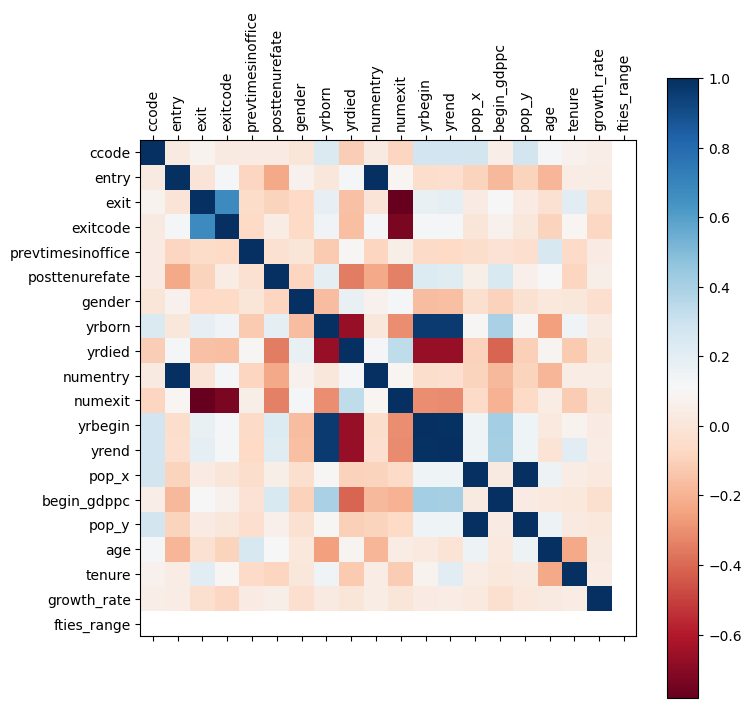

In [4]:
# delete unused data
del data_all['end_gdppc']
del data_all['country']

# Fig.2 of the correlations plot
# The correlations of all the variables used in this study sample: leaders' age, leaders' tenure
corr= data_all.corr()

# Visualize the corelation between each column
fig = plt.figure(figsize =(8,8))
corr_plot = plt.matshow(corr, cmap='RdBu', fignum = fig.number)
fig.colorbar(corr_plot)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

### Group the tenure into five possible values

- 1 for single term - equal to or less than 4 years; 
- 2 for two terms - between 5 and 8 years;
- 3 for three terms -  between 9 and 12 years;
- 4 for four terms - between 13 and 16 years;
- 5 for five or more terms

In [ ]:
# data.dtypes

# Visualize the differences about leaders' gender for the whole data set
# ax= sns.histplot(data.gender, shrink = 0.8, bins=10, color='grey') 
# import numpy as np
# data['fties_range'] = np.where(data['fties'].isnull(), 0.5, 1)
# data['gender'] = np.where(data['gender']=='M', 0.5, 1)
#data['logarithm_gdppc'] = np.log(data['gdppc'])
#data['normal_tenure'] = (data['tenure'] - data['tenure'].mean()) / data['tenure'].std()#normalize tenure with z-score
# corr= data.corr()

# #visualize the corelation between each column
# fig = plt.figure(figsize =(8,8))
# #plt.matshow(corr, cmap='RdBu', fignum = fig.number)
# plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
# sns.heatmap(corr, cmap='RdBu')
# plt.yticks(range(len(corr.columns)), corr.columns)
# fig.savefig('heatmap.png',dpi=600)

In [5]:
from scipy.stats import norm

# Group growth_rate into seven groups according to the central limit theorem
mu, std = norm.fit(data_all['growth_rate'])
conditions = [
    (data_all['growth_rate'] < -mu-3*std),
    (data_all['growth_rate'] >= -mu-3*std) & (data_all['growth_rate'] < -mu-2*std),
    (data_all['growth_rate'] >= -mu-2*std) & (data_all['growth_rate'] < -mu-std),
    (data_all['growth_rate'] >= -mu-std) & (data_all['growth_rate'] < mu+std),
    (data_all['growth_rate'] >= mu+std) & (data_all['growth_rate'] < mu+2*std),
    (data_all['growth_rate'] >= mu+2*std) & (data_all['growth_rate'] < mu+3*std),
    (data_all['growth_rate'] >= mu+3*std)
]

values = [7, 6, 5, 4, 3, 2, 1]

data_all['growth_rate_normgroup'] = np.select(conditions, values)

In [6]:
# Group growth_rate into seven groups according to min and max
min, max = data_all['growth_rate'].min(), data_all['growth_rate'].max()
conditions = [
    (data_all['growth_rate'] < min+1/7*(max-min)),
    (data_all['growth_rate'] >= min+1/7*(max-min)) & (data_all['growth_rate'] < min+2/7*(max-min)),
    (data_all['growth_rate'] >= min+2/7*(max-min)) & (data_all['growth_rate'] < min+3/7*(max-min)),
    (data_all['growth_rate'] >= min+3/7*(max-min)) & (data_all['growth_rate'] < min+4/7*(max-min)),
    (data_all['growth_rate'] >= min+4/7*(max-min)) & (data_all['growth_rate'] < min+5/7*(max-min)),
    (data_all['growth_rate'] >= min+5/7*(max-min)) & (data_all['growth_rate'] < min+6/7*(max-min)),
    (data_all['growth_rate'] >= min+6/7*(max-min))
]
    
values = [7, 6, 5, 4, 3, 2, 1]

data_all['growth_rate_avggrp'] = np.select(conditions, values)

In [7]:
# Save dataset to CSV file
data_all.to_csv(r'./../Data/data_AutoGluon_final.csv', index = False)